In [1]:
# Import packages!
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device config.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
# Hyperparameters!
input_size = 784 # 28*28, image size
hidden_size = 100
num_classes = 10
epochs = 15
batch_size = 100
learning_rate = 0.001

In [11]:
# MNIST!
train_data = torchvision.datasets.MNIST(root='.\data', train=True, 
                                        transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='.\data', train=False, 
                                        transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

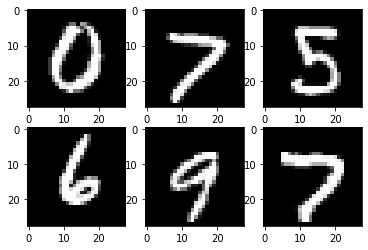

In [12]:
examples = iter(train_loader)
samples, labels = examples.next()

# Visualize samples
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [13]:
# Build model!
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.l_relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.l_relu(out)
        out = self.linear2(out)
        return out

In [14]:
# Initialize model
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# Training loop
n_total_steps = len(train_loader)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape! (100, 1, 28, 28) to (100, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass and compute the loss.
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass : Calculate gradients and update weights with optimizers.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print some info(per epoch) as we train
        if (i+1) % 600 == 0:
            print(f'Epoch: {epoch+1}/{epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}')

Epoch: 1/15, Step: 600/600, Loss: 0.0190
Epoch: 2/15, Step: 600/600, Loss: 0.0114
Epoch: 3/15, Step: 600/600, Loss: 0.0150
Epoch: 4/15, Step: 600/600, Loss: 0.0026
Epoch: 5/15, Step: 600/600, Loss: 0.0106
Epoch: 6/15, Step: 600/600, Loss: 0.0107
Epoch: 7/15, Step: 600/600, Loss: 0.0077
Epoch: 8/15, Step: 600/600, Loss: 0.0059
Epoch: 9/15, Step: 600/600, Loss: 0.0035
Epoch: 10/15, Step: 600/600, Loss: 0.0038
Epoch: 11/15, Step: 600/600, Loss: 0.0033
Epoch: 12/15, Step: 600/600, Loss: 0.0038
Epoch: 13/15, Step: 600/600, Loss: 0.0098
Epoch: 14/15, Step: 600/600, Loss: 0.0039
Epoch: 15/15, Step: 600/600, Loss: 0.0023


In [17]:
# Model evaluation            
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 784).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.00 * (n_correct/n_samples)
    
print(f'Accuracy: {acc:.2f}% ~ {round(acc)}%')    

Accuracy: 97.83% ~ 98%


In [19]:
# ifunanyaScript